In [1]:
import pandas as pd

platy_data = pd.read_csv('../data/species_Platyhelminthes--___w_labels.csv')

In [2]:
df = platy_data

In [3]:
df.head()

,Species Name,Provider,Assembly,BioProject ID,Clade,Genome Browser,N50,Genome Size,Number of Scaffolds,Number of Coding Genes,label
0,Atriophallophorus winterbourni,Swiss Federal Institute of Technology in Zurich,ASM1340708v1,PRJNA636673,Trematoda (Flukes),JBrowse | Ensembl,"39,978","601,728,533","26,114","11,499",atriophallophorus_winterbourni_PRJNA636673
1,Clonorchis sinensis,Sun Yat-sen University,C_sinensis-2.0,PRJDA72781,Trematoda (Flukes),JBrowse | Ensembl,"415,842","547,288,241","4,348","13,634",clonorchis_sinensis_PRJDA72781
2,Clonorchis sinensis,The University of Melbourne,CSKR.v2,PRJNA386618,Trematoda (Flukes),JBrowse | Ensembl,"168,711,085","558,124,894",78,"13,489",clonorchis_sinensis_PRJNA386618
3,Dibothriocephalus latus,Wellcome Sanger Institute,D_latum_Geneva_0011_upd,PRJEB1206,Cestoda (Tapeworms),JBrowse | Ensembl,"6,726","531,434,409","140,294","19,966",dibothriocephalus_latus_PRJEB1206
4,Dicrocoelium dendriticum,Wellcome Sanger Institute,tdDicDend1.1,PRJEB44434,Trematoda (Flukes),JBrowse | Ensembl,"117,106,881","1,889,995,958","19,456","13,685",dicrocoelium_dendriticum_PRJEB44434


In [12]:
import pandas as pd
import json

# Assuming df is your pandas DataFrame with a column named 'label'

# Function to fetch data for a given label
def fetch_data(label):
    url = f"https://parasite.wormbase.org/rest-18/info/quality/{label}?"
    result = %system wget -q --header='Content-type:application/json' '{url}' -O -
    if result:
        return json.loads(result[0])
    else:
        return None

# Function to update DataFrame with fetched data
def update_dataframe(row):
    data = fetch_data(row['label'])
    if data:
        for key, value in data.items():
            row[key] = value
    return row

# Apply the update_dataframe function to each row
df = df.apply(update_dataframe, axis=1)


In [5]:
import seaborn as sns

In [13]:
df

,Species Name,Provider,Assembly,BioProject ID,Clade,Genome Browser,N50,Genome Size,Number of Scaffolds,Number of Coding Genes,label
0,Atriophallophorus winterbourni,Swiss Federal Institute of Technology in Zurich,ASM1340708v1,PRJNA636673,Trematoda (Flukes),JBrowse | Ensembl,"39,978","601,728,533","26,114","11,499",atriophallophorus_winterbourni_PRJNA636673
1,Clonorchis sinensis,Sun Yat-sen University,C_sinensis-2.0,PRJDA72781,Trematoda (Flukes),JBrowse | Ensembl,"415,842","547,288,241","4,348","13,634",clonorchis_sinensis_PRJDA72781
2,Clonorchis sinensis,The University of Melbourne,CSKR.v2,PRJNA386618,Trematoda (Flukes),JBrowse | Ensembl,"168,711,085","558,124,894",78,"13,489",clonorchis_sinensis_PRJNA386618
3,Dibothriocephalus latus,Wellcome Sanger Institute,D_latum_Geneva_0011_upd,PRJEB1206,Cestoda (Tapeworms),JBrowse | Ensembl,"6,726","531,434,409","140,294","19,966",dibothriocephalus_latus_PRJEB1206
4,Dicrocoelium dendriticum,Wellcome Sanger Institute,tdDicDend1.1,PRJEB44434,Trematoda (Flukes),JBrowse | Ensembl,"117,106,881","1,889,995,958","19,456","13,685",dicrocoelium_dendriticum_PRJEB44434
...,...,...,...,...,...,...,...,...,...,...,...
58,Taenia multiceps,Chinese Academy of Agricultural Sciences,ASM192302v3,PRJNA307624,Cestoda (Tapeworms),JBrowse | Ensembl,"44,815,576","240,610,560",738,"12,890",taenia_multiceps_PRJNA307624
59,Taenia saginata,Chinese Academy of Agricultural Sciences,ASM169307v2,PRJNA71493,Cestoda (Tapeworms),JBrowse | Ensembl,"585,232","169,104,283","3,626","13,161",taenia_saginata_PRJNA71493
60,Taenia solium,National University of Mexico,Tsolium_Mexico_v1,PRJNA170813,Cestoda (Tapeworms),JBrowse | Ensembl,"67,829","122,393,951","11,237","12,467",taenia_solium_PRJNA170813
61,Trichobilharzia regenti,Wellcome Sanger Institute,tdTriRege1.1,PRJEB44434,Trematoda (Flukes),JBrowse | Ensembl,"125,840,967","954,258,533",573,"14,478",trichobilharzia_regenti_PRJEB44434


In [8]:
dale = {}
for x,y in df.iterrows():
    try:
        #print(y['label'], y.get('busco_assembly').get('complete', 0))
        dale.update({y['label']: y.get('busco_assembly').get('complete', 0)})
    except:
        pass

<Axes: >

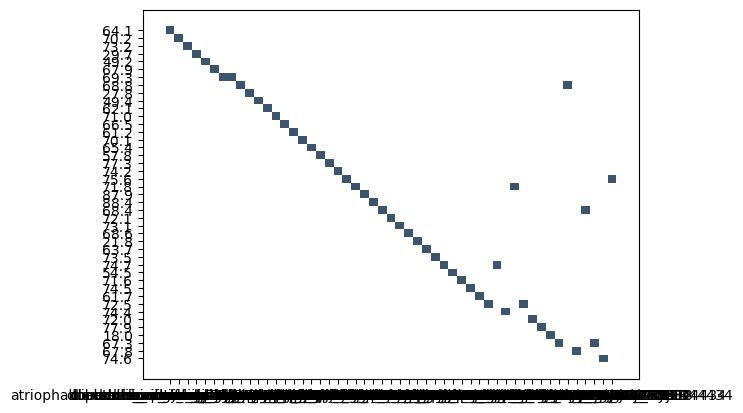

In [43]:
sns.histplot(x = dale.keys(), y = dale.values())

In [9]:
dale.values()

dict_values([])

In [10]:
[x for x,y in dale.items() if float(y) >= 75]

[]

In [51]:
[x for x,y in dale.items() if float(y) >= 70]

['clonorchis_sinensis_PRJDA72781',
 'clonorchis_sinensis_PRJNA386618',
 'fasciola_hepatica_PRJEB25283',
 'gyrodactylus_bullatarudis_PRJNA532341',
 'hymenolepis_diminuta_PRJEB30942',
 'hymenolepis_diminuta_PRJEB507',
 'hymenolepis_microstoma_PRJEB124',
 'hymenolepis_nana_PRJEB508',
 'macrostomum_lignano_PRJNA284736',
 'macrostomum_lignano_PRJNA371498',
 'opisthorchis_felineus_PRJNA413383',
 'opisthorchis_viverrini_PRJNA222628',
 'schistosoma_bovis_PRJNA451066',
 'schistosoma_curassoni_PRJEB44434',
 'schistosoma_guineensis_PRJEB44434',
 'schistosoma_haematobium_PRJNA78265',
 'schistosoma_japonicum_PRJNA520774',
 'schistosoma_mansoni_PRJEA36577',
 'schistosoma_margrebowiei_PRJEB44434',
 'schistosoma_mattheei_PRJEB44434',
 'schistosoma_spindale_PRJEB44434',
 'schistosoma_turkestanicum_PRJEB44434',
 'schmidtea_mediterranea_PRJNA12585',
 'trichobilharzia_regenti_PRJEB44434',
 'trichobilharzia_szidati_PRJEB44434']

In [52]:
len([x for x,y in dale.items() if float(y) >= 70])

25

In [47]:
targets = [x for x,y in dale.items() if float(y) >= 65]

In [49]:
targets = ['clonorchis_sinensis_PRJDA72781',
 'clonorchis_sinensis_PRJNA386618',
 'echinococcus_canadensis_PRJEB8992',
 'echinococcus_granulosus_PRJEB121',
 'echinococcus_granulosus_PRJNA182977',
 'echinococcus_multilocularis_PRJEB122',
 'fasciola_hepatica_PRJEB25283',
 'fasciola_hepatica_PRJNA179522',
 'gyrodactylus_bullatarudis_PRJNA532341',
 'gyrodactylus_salaris_PRJNA244375',
 'hymenolepis_diminuta_PRJEB30942',
 'hymenolepis_diminuta_PRJEB507',
 'hymenolepis_microstoma_PRJEB124',
 'hymenolepis_nana_PRJEB508',
 'macrostomum_lignano_PRJNA284736',
 'macrostomum_lignano_PRJNA371498',
 'mesocestoides_corti_PRJEB510',
 'opisthorchis_felineus_PRJNA413383',
 'opisthorchis_viverrini_PRJNA222628',
 'paragonimus_westermani_PRJNA454344',
 'schistosoma_bovis_PRJNA451066',
 'schistosoma_curassoni_PRJEB44434',
 'schistosoma_guineensis_PRJEB44434',
 'schistosoma_haematobium_PRJNA78265',
 'schistosoma_japonicum_PRJNA520774',
 'schistosoma_mansoni_PRJEA36577',
 'schistosoma_margrebowiei_PRJEB44434',
 'schistosoma_mattheei_PRJEB44434',
 'schistosoma_spindale_PRJEB44434',
 'schistosoma_turkestanicum_PRJEB44434',
 'schmidtea_mediterranea_PRJNA12585',
 'taenia_asiatica_PRJEB532',
 'taenia_asiatica_PRJNA299871',
 'taenia_multiceps_PRJNA307624',
 'taenia_saginata_PRJNA71493',
 'taenia_solium_PRJNA170813',
 'trichobilharzia_regenti_PRJEB44434',
 'trichobilharzia_szidati_PRJEB44434']

In [5]:
import os

os.mkdir('../data/platyhelminthes_dataset_vfinal/')

In [45]:
df

,Species Name,Provider,Assembly,BioProject ID,Clade,Genome Browser,N50,Genome Size,Number of Scaffolds,Number of Coding Genes,label
0,Atriophallophorus winterbourni,Swiss Federal Institute of Technology in Zurich,ASM1340708v1,PRJNA636673,Trematoda (Flukes),JBrowse | Ensembl,"39,978","601,728,533","26,114","11,499",atriophallophorus_winterbourni_PRJNA636673
1,Clonorchis sinensis,Sun Yat-sen University,C_sinensis-2.0,PRJDA72781,Trematoda (Flukes),JBrowse | Ensembl,"415,842","547,288,241","4,348","13,634",clonorchis_sinensis_PRJDA72781
2,Clonorchis sinensis,The University of Melbourne,CSKR.v2,PRJNA386618,Trematoda (Flukes),JBrowse | Ensembl,"168,711,085","558,124,894",78,"13,489",clonorchis_sinensis_PRJNA386618
3,Dibothriocephalus latus,Wellcome Sanger Institute,D_latum_Geneva_0011_upd,PRJEB1206,Cestoda (Tapeworms),JBrowse | Ensembl,"6,726","531,434,409","140,294","19,966",dibothriocephalus_latus_PRJEB1206
4,Dicrocoelium dendriticum,Wellcome Sanger Institute,tdDicDend1.1,PRJEB44434,Trematoda (Flukes),JBrowse | Ensembl,"117,106,881","1,889,995,958","19,456","13,685",dicrocoelium_dendriticum_PRJEB44434
...,...,...,...,...,...,...,...,...,...,...,...
58,Taenia multiceps,Chinese Academy of Agricultural Sciences,ASM192302v3,PRJNA307624,Cestoda (Tapeworms),JBrowse | Ensembl,"44,815,576","240,610,560",738,"12,890",taenia_multiceps_PRJNA307624
59,Taenia saginata,Chinese Academy of Agricultural Sciences,ASM169307v2,PRJNA71493,Cestoda (Tapeworms),JBrowse | Ensembl,"585,232","169,104,283","3,626","13,161",taenia_saginata_PRJNA71493
60,Taenia solium,National University of Mexico,Tsolium_Mexico_v1,PRJNA170813,Cestoda (Tapeworms),JBrowse | Ensembl,"67,829","122,393,951","11,237","12,467",taenia_solium_PRJNA170813
61,Trichobilharzia regenti,Wellcome Sanger Institute,tdTriRege1.1,PRJEB44434,Trematoda (Flukes),JBrowse | Ensembl,"125,840,967","954,258,533",573,"14,478",trichobilharzia_regenti_PRJEB44434


In [50]:
# downloading proteomes
import tqdm
from ftplib import FTP

# Assuming df is your pandas DataFrame with a column named 'label'

# Function to extract species name and project ID from label
def extract_info(label):
    parts = label.split('_')
    species_name = '_'.join(parts[:-1])
    project_id = parts[-1]
    return species_name, project_id

# Function to download files from FTP
def download_files(species_name, project_id):
    ftp_url = f"ftp://ftp.ebi.ac.uk/pub/databases/wormbase/parasite/releases/WBPS18/species/{species_name}/{project_id}/"
    ftp = FTP('ftp.ebi.ac.uk')
    ftp.login()
    ftp.cwd(f"/pub/databases/wormbase/parasite/releases/WBPS18/species/{species_name}/{project_id}/")
    filenames = ftp.nlst()
    for filename in filenames:
        if 'protein' in filename:
            with open(filename, 'wb') as f:
                ftp.retrbinary(f"RETR {filename}", f.write)
    ftp.quit()

# Iterate over each label, extract species name and project ID, and download files
for label in tqdm.tqdm(targets):
    species_name, project_id = extract_info(label)
    download_files(species_name, project_id)
    %system mv *protein* ../data/platyhelminthes_dataset_vfinal/

100%|███████████████████████████████████████████| 38/38 [04:57<00:00,  7.82s/it]


In [13]:
targets

[]